# L01

she started talking about heart.
electrocardiogram is the  process of recording the electrical activity of the heart over a period of time using electrodes placed on the skin.
they're putted on the arms and legs.

**Feature**: a characteristic definied part of the data, in the electrocardiogram it's the peaks.

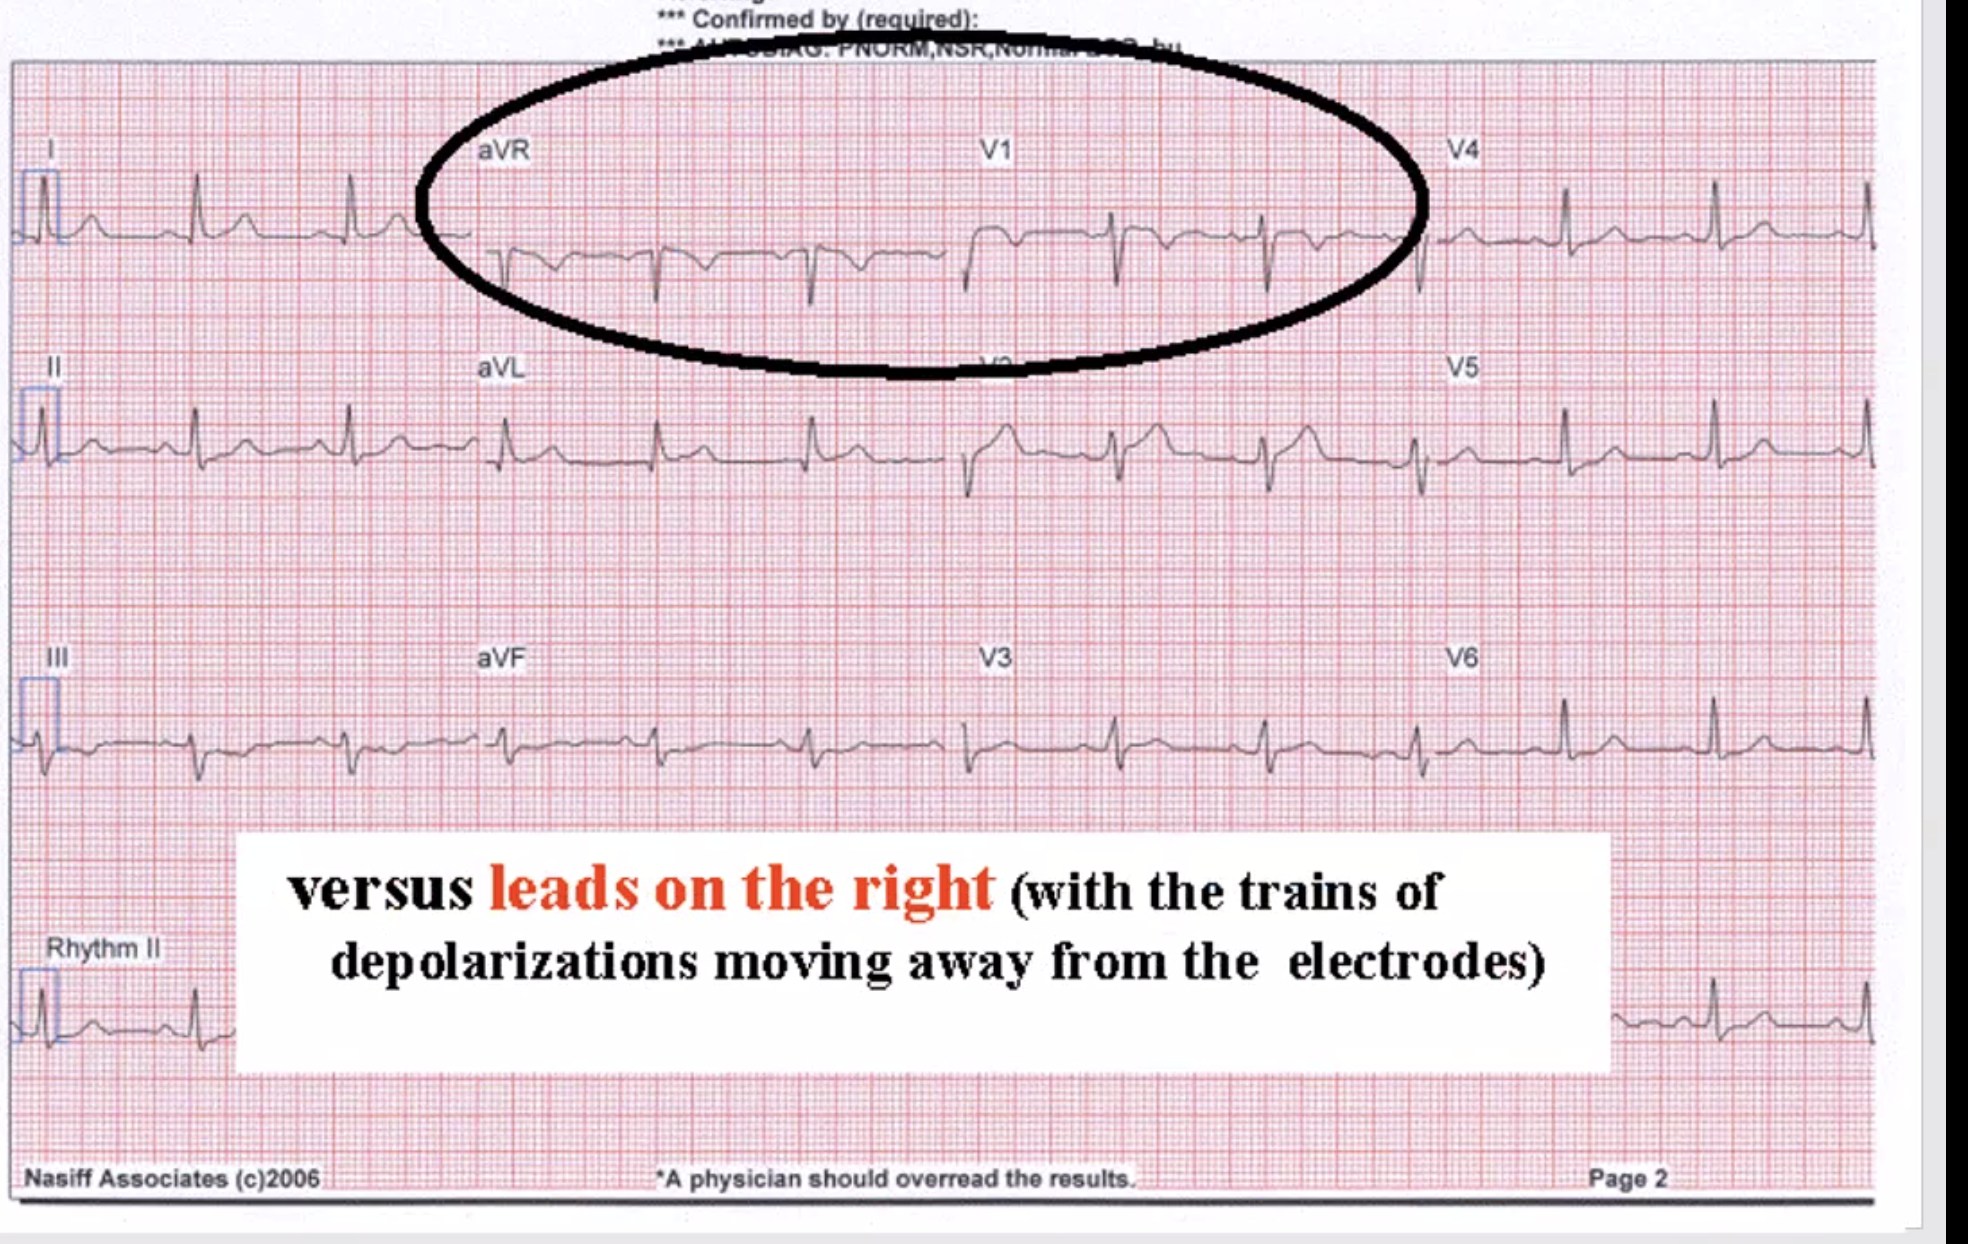

data and features should be seen in a different approach from data scientists

### Electroencefalography EEG

used to observe the various electrical currents of the brain.
There are neurons perpedicular to the surface of the skin, which let's us study them easily.  
**2 phases:**
- pre sinaptic signal
- post sinaptic signal
they're very different, so essily distinguishable.

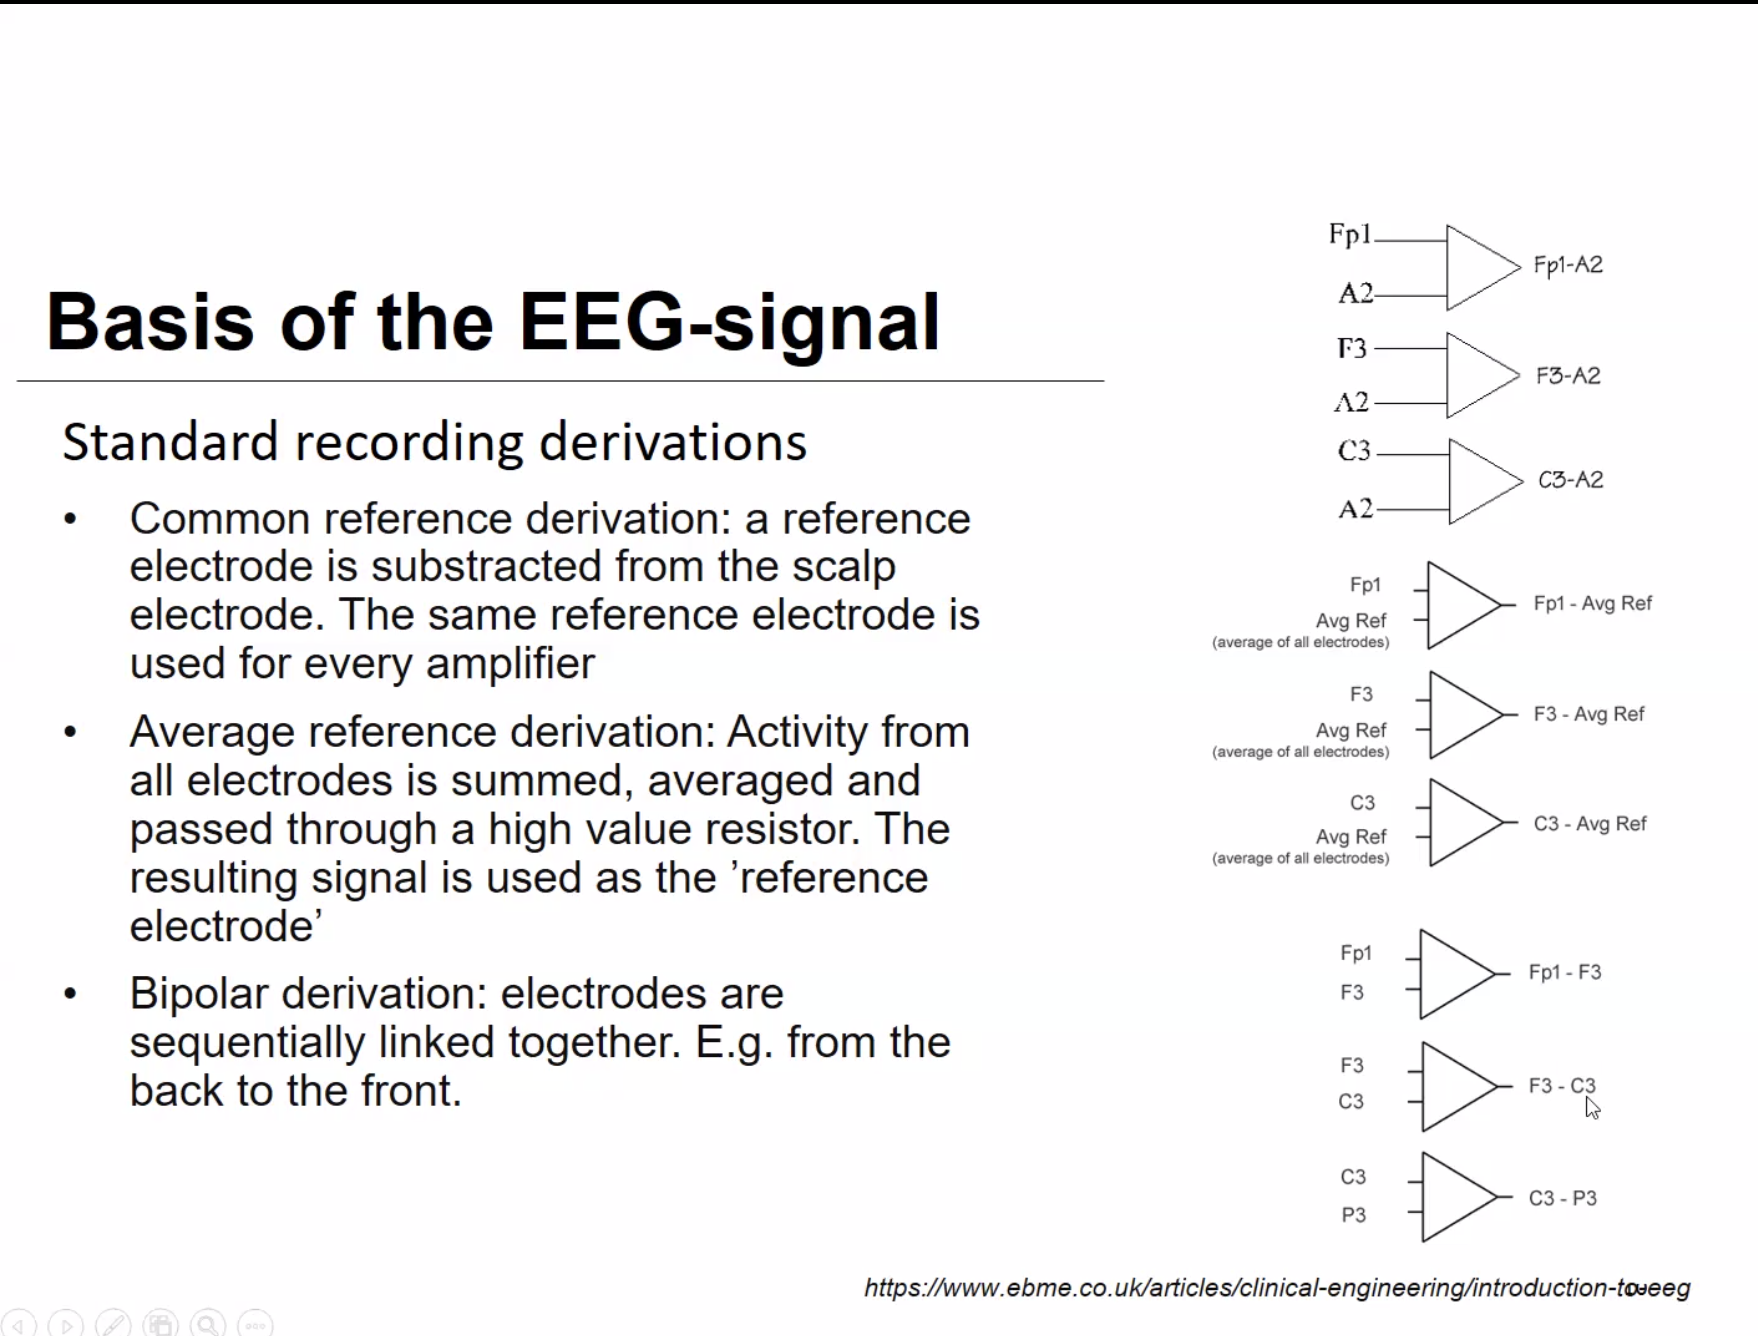

**4 different signals:**

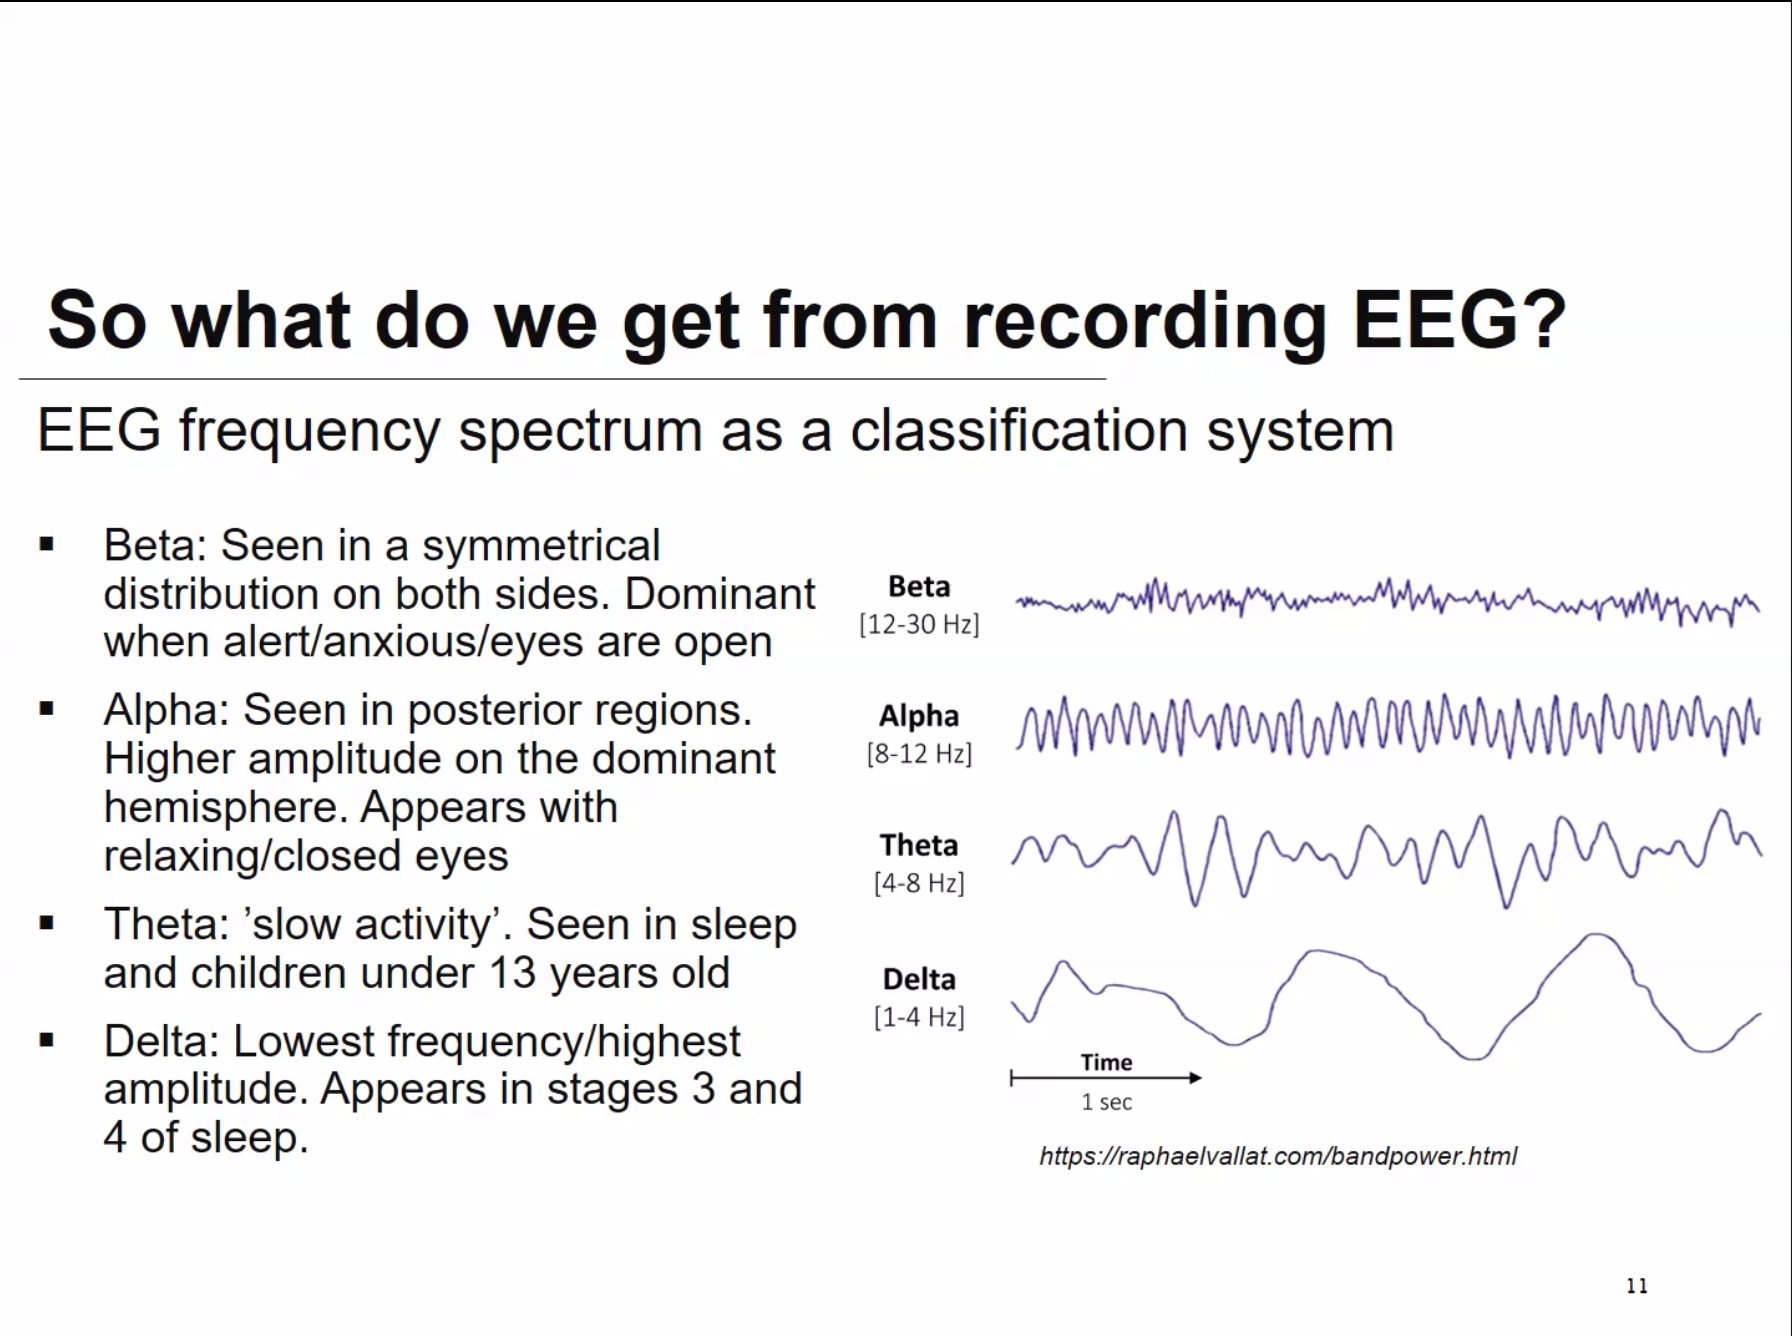

what are the projects about?

- **screen** patients, to screen them, we need both healthy subjects and subjects with the disease.
- **diagnose** patients, it's different because we do an inference. We have to be sure of dieseases presence and the characterization of that disease.
- **predict** the response to treatments.

Two metrics:
- **sensitivity**
- **specificity**
we have to choose which one to maximize.
screen we maximize specificity, diagnose sensibility, we use roc curves.

datasets is about 500 patiets of eeg recording of many channels, approximately 4096 channels.
row are patiets, col have the signals of the phases during an ecg recordings. last column is the class of the patiets, called y, it has a range of 5, it gives the severeness of the dieases. we have to discreminate class 3 to class 4 of the patients.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('EEG-data.csv', sep=',', index_col=0)
df

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X4086  X4087  \
0    -56  -50  -64  -91 -135 -140 -134 -114 -115 -126  ...    -37    -43   
1     14   25   31   36   33   33   27   27   21   24  ...    -45    -32   
2   -159 -176 -174 -145 -101  -45    0   29   15   15  ...    -40    -25   
3     34   31   29   19   16   12    3   -1   -5   -8  ...    -34    -33   
4     44   50   46   43   43   46   45   40   36   31  ...      4      5   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
495   12   22   35   45   69   74   79   78   66   43  ...    -22    -21   
496   35   41   56   70   82   91  101  104  112  115  ...      9     11   
497   51   79   94   97  108  114  105   78   47   25  ...     57     48   
498   56   45   39   40   45   53   55   53   58   68  ...    -24    -21   
499  -68  -68  -65  -62  -55  -51  -35  -40  -39  -41  ...    478    378   

     X4088  X4089  X4090  X4091  X4092  X4093  X4094  y  
0      -63    -82   -114   -138   -159   -172   -180  5  
1       -6     -7     -2    -20    -34    -40    -40  5  
2       14     56     73     48    -12    -62   -100  4  
3      -29    -22    -18    -14    -10     -9      0  3  
4        6      6      2      1      0     -1     -4  2  
..     ...    ...    ...    ...    ...    ...    ... ..  
495    -21    -25    -26    -26    -38    -38    -41  5  
496     17     39     54     54     34     29     31  2  
497     36     28     23     30     36     49     47  4  
498    -27    -37    -27    -18      0    -27    -34  1  
499    250    137     57     17      0      7     26  3  

[500 rows x 4095 columns]

This simple script allowa us to show the EEC of a patient, first by filtering by severity of the disease, and then by selecting the patient wanted.

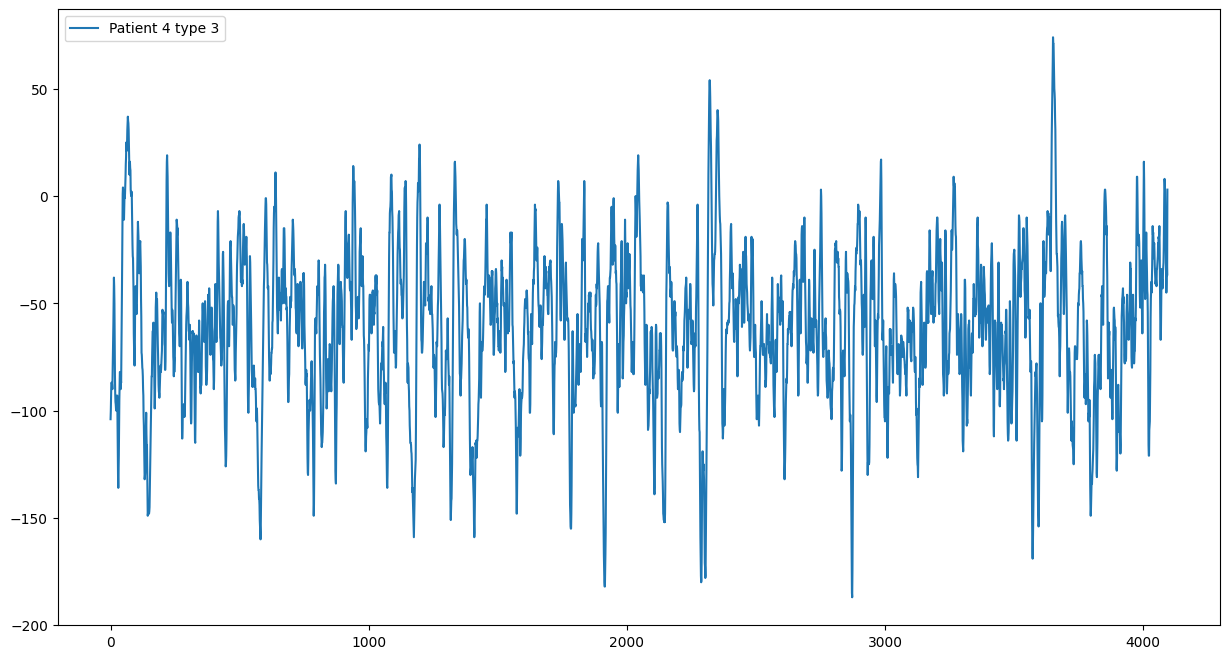

In [2]:
patientsType = 3
patient = 4

plt.figure(figsize=(15, 8))
plt.plot(range(0, len(df.columns)), df[df['y'] == patientsType].iloc[patient], label='Patient ' + str(patient) + ' type ' + str(patientsType))
plt.legend()
plt.show()

In [3]:
df[df['y'] == 3].describe()

X1          X2          X3          X4          X5          X6  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean   -14.530000  -14.740000  -17.060000  -18.770000  -19.610000  -20.570000   
std     50.669548   52.341269   54.160782   54.895834   55.124816   55.845251   
min   -148.000000 -155.000000 -171.000000 -203.000000 -186.000000 -170.000000   
25%    -54.000000  -54.500000  -53.250000  -59.750000  -56.250000  -57.000000   
50%    -11.000000  -10.500000  -10.500000  -14.500000  -17.000000  -16.000000   
75%     17.750000   19.000000   16.500000   10.500000   16.250000   19.250000   
max    133.000000  129.000000  124.000000  106.000000  104.000000  106.000000   

               X7          X8          X9         X10  ...       X4086  \
count  100.000000  100.000000  100.000000  100.000000  ...  100.000000   
mean   -20.560000  -20.930000  -21.440000  -22.510000  ...   -8.870000   
std     56.402651   55.950962   57.268342   59.826263  ...   78.985314   
min   -154.000000 -159.000000 -199.000000 -225.000000  ... -186.000000   
25%    -61.250000  -61.000000  -64.000000  -65.250000  ...  -46.250000   
50%    -16.000000  -16.500000  -14.000000  -15.000000  ...   -9.000000   
75%     19.250000   19.250000   17.250000   18.000000  ...   16.250000   
max    114.000000  127.000000  134.000000  135.000000  ...  478.000000   

            X4087       X4088       X4089       X4090       X4091       X4092  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean   -10.440000  -11.660000  -13.190000  -12.240000   -8.670000   -4.500000   
std     70.537234   66.290792   63.155683   61.199643   60.449337   58.907135   
min   -192.000000 -180.000000 -191.000000 -181.000000 -159.000000 -158.000000   
25%    -46.250000  -51.250000  -50.250000  -50.750000  -50.000000  -44.500000   
50%    -12.000000   -9.000000  -10.000000   -7.000000   -4.000000   -2.500000   
75%     17.000000   13.750000   16.000000   20.250000   20.750000   25.250000   
max    378.000000  250.000000  184.000000  164.000000  172.000000  170.000000   

            X4093       X4094      y  
count  100.000000  100.000000  100.0  
mean    -3.190000   -2.310000    3.0  
std     55.567539   55.370687    0.0  
min   -138.000000 -134.000000    3.0  
25%    -38.250000  -38.250000    3.0  
50%     -3.500000   -3.500000    3.0  
75%     30.250000   30.000000    3.0  
max    185.000000  245.000000    3.0  

[8 rows x 4095 columns]

This plot tries to describe the expected value of the EEC, and the corresponding lines that delimitate 1 standard deviation from the mean, every value outside these points can be flagged as an outlier (it's a very naive way to start flagging outliers)

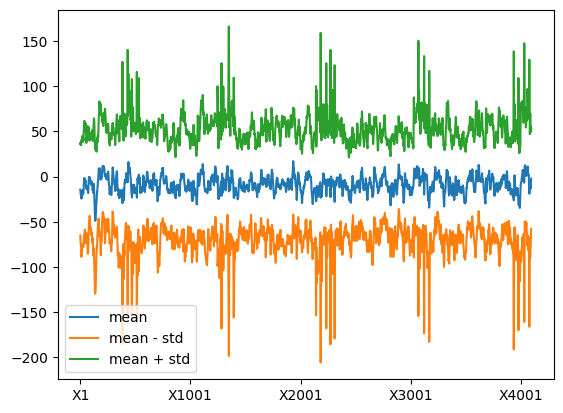

In [4]:
df[df['y'] == 3].describe().iloc[1][:-1].plot( label='mean')
(df[df['y'] == 3].describe().iloc[1][:-1] - df[df['y'] == 3].describe().iloc[2][:-1]).plot(label='mean - std')
(df[df['y'] == 3].describe().iloc[1][:-1] + df[df['y'] == 3].describe().iloc[2][:-1]).plot( label='mean + std')
plt.legend()
plt.show()

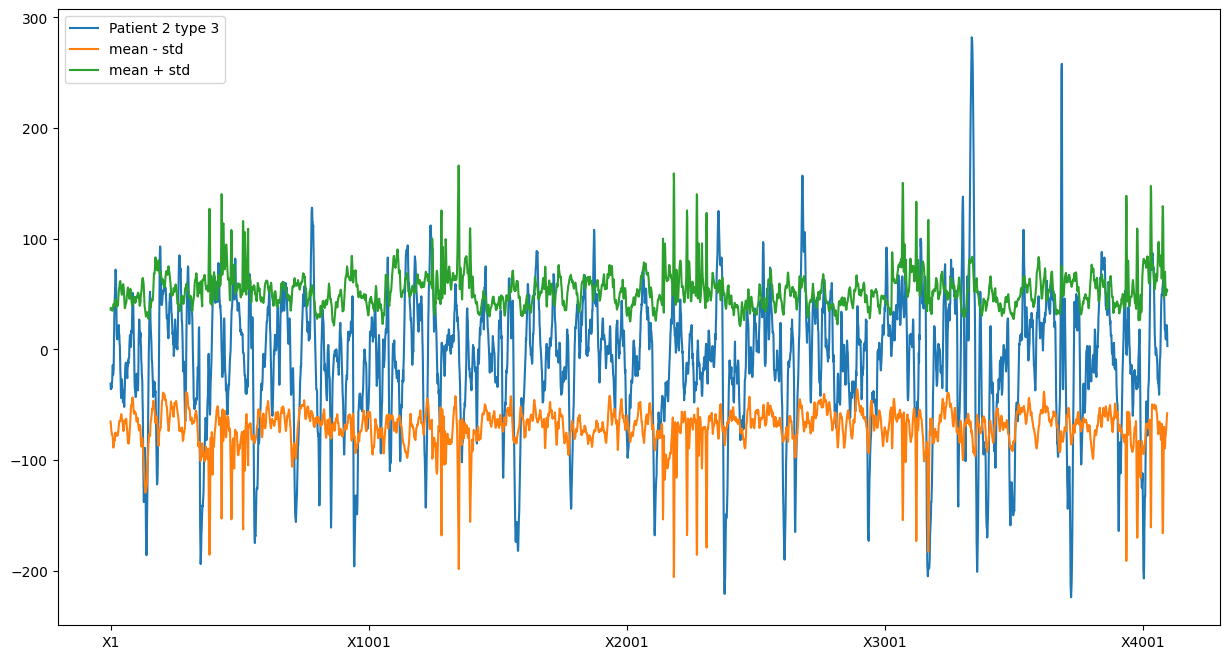

In [8]:
patientsType = 3
patient = 2

plt.figure(figsize=(15, 8))
plt.plot(range(0, len(df.columns)), df[df['y'] == patientsType].iloc[patient], label='Patient ' + str(patient) + ' type ' + str(patientsType))
(df[df['y'] == 3].describe().iloc[1][:-1] - df[df['y'] == 3].describe().iloc[2][:-1]).plot(label='mean - std')
(df[df['y'] == 3].describe().iloc[1][:-1] + df[df['y'] == 3].describe().iloc[2][:-1]).plot( label='mean + std')
plt.legend()
plt.show()